## DATA UNDERSTANDING
The  data comprising time series for predect mean tempreture

In [ ]:

import pandas as pd

df = pd.read_csv('/content/DailyDelhiClimateTrain.csv',index_col='date')

df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
df.drop(columns=['meanpressure', 'wind_speed','humidity'],inplace=True)
df

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# meantemp = sc.fit_transform(df["meantemp"].values.reshape(-1,1))[:, -1]

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meantemp  1462 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [ ]:
df.describe()

,meantemp
count,1462.000000
mean,25.495521
std,7.348103
min,6.000000
25%,18.857143
50%,27.714286
75%,31.305804
max,38.714286


In [ ]:
df.dtypes

meantemp    float64
dtype: object

In [ ]:
test_data=pd.read_csv('/content/DailyDelhiClimateTest.csv',index_col='date')
test_data.drop(columns=['meanpressure', 'wind_speed','humidity'],inplace=True)
test_data.index = pd.to_datetime(test_data.index)
test_data

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


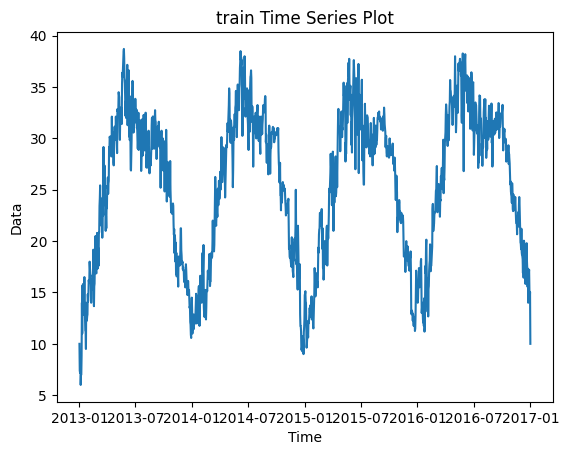

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(df.index, df['meantemp'])

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('train Time Series Plot')
#plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# from math import floor
# r = floor(1462 *0.8)
# test= 1462-r
# print(r)
# train_data = df[:r]
# test_data = df [r:]
# train_data.info(), test_data.info()

In [ ]:
train_data = df

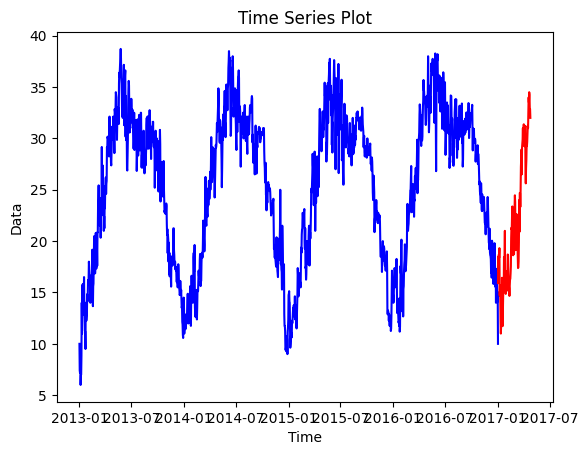

In [ ]:
plt.plot(train_data.index ,train_data['meantemp'], color='blue', label='Train data')


plt.plot(test_data.index, test_data['meantemp'], color='red', label='test data')
# Customize the plot
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series Plot')

plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

adf_test = sm.tsa.stattools.adfuller(train_data['meantemp'])
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')


ADF Statistic: -2.0210690559206737
p-value: 0.2774121372301601


In [ ]:
#df = df.resample('M').count()
#df = df.resample('d').mean()

## convert non stationary to staionary

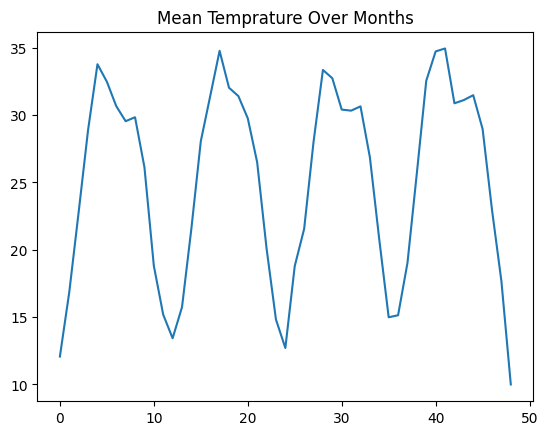

In [ ]:
df_year_month = df.groupby(by=[df.index.year,df.index.month])['meantemp'].mean()
plt.title("Mean Temprature Over Months")
plt.plot(df_year_month.values)

In [ ]:
adf_test = sm.tsa.stattools.adfuller(df_year_month.values)
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')


ADF Statistic: -1.0462204206798933
p-value: 0.7360356050589151


In [ ]:
df

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [ ]:

cubed_root_df = train_data["meantemp"].values ** (1/3)
train_data["cubed_root_df"] = cubed_root_df

cubed_root_df1 = test_data["meantemp"].values ** (1/3)
test_data ["cubed_root_df"] =cubed_root_df1
# train_data = df[:r]
# test_data = df [r:]

In [ ]:
adf_test = sm.tsa.stattools.adfuller(df["cubed_root_df"])
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')


ADF Statistic: -3.2096571476672446
p-value: 0.019432446712126912


## models

In [ ]:

model = ARIMA(train_data["cubed_root_df"],order=(1, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          cubed_root_df   No. Observations:                 1462
Model:                 ARIMA(1, 0, 2)   Log Likelihood                1882.067
Date:                Wed, 09 Aug 2023   AIC                          -3754.134
Time:                        11:16:36   BIC                          -3727.696
Sample:                    01-01-2013   HQIC                         -3744.272
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8039      0.126     22.198      0.000       2.556       3.051
ar.L1          0.9921      0.003    314.238      0.000       0.986       0.998
ma.L1         -0.2166      0.021    -10.328      0.0

In [ ]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
predictions.shape

(114,)

In [ ]:
predictions

2017-01-02    2.226957
2017-01-03    2.266055
2017-01-04    2.270318
2017-01-05    2.274547
2017-01-06    2.278743
                ...   
2017-04-21    2.576172
2017-04-22    2.577977
2017-04-23    2.579767
2017-04-24    2.581544
2017-04-25    2.583306
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

In [ ]:
test_data

,meantemp,cubed_root_df
date,,
2017-01-01,15.913043,2.515269
2017-01-02,18.500000,2.644786
2017-01-03,17.111111,2.576871
2017-01-04,18.700000,2.654283
2017-01-05,18.388889,2.639481
...,...,...
2017-04-20,34.500000,3.255415
2017-04-21,34.250000,3.247533
2017-04-22,32.900000,3.204291


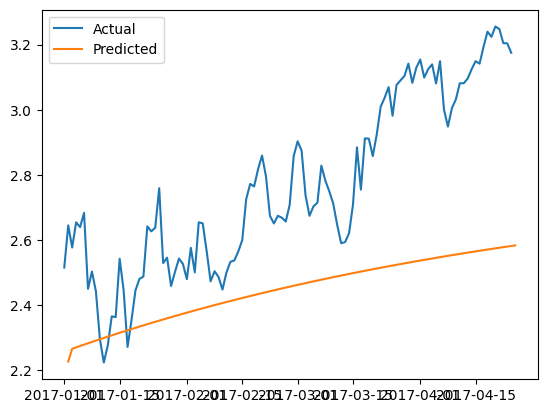

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE and RMSE for the forecast horizon
mae = mean_absolute_error(test_data['cubed_root_df'], predictions)
rmse_ARIMA = mean_squared_error(test_data['cubed_root_df'], predictions, squared=False)

# Plot the predicted values against the actual values
plt.plot(test_data['cubed_root_df'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

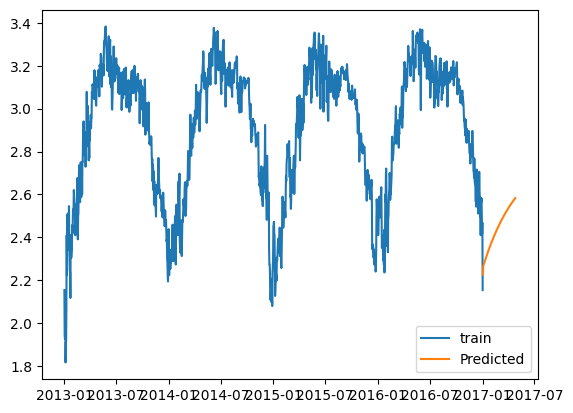

In [ ]:
# Plot the predicted values against the actual values
plt.plot(train_data['cubed_root_df'], label='train')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)
window_size=3
X_train, y_train = create_sequences(train_data["cubed_root_df"], window_size)

X_test, y_test = create_sequences(test_data["cubed_root_df"], window_size)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(window_size, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
46/46 [==============================] - 7s 9ms/step - loss: 4.4189
Epoch 2/30
46/46 [==============================] - 1s 11ms/step - loss: 0.0880
Epoch 3/30
46/46 [==============================] - 1s 10ms/step - loss: 0.0192
Epoch 4/30
46/46 [==============================] - 0s 7ms/step - loss: 0.0179
Epoch 5/30
46/46 [==============================] - 0s 6ms/step - loss: 0.0170
Epoch 6/30
46/46 [==============================] - 0s 6ms/step - loss: 0.0159
Epoch 7/30
46/46 [==============================] - 0s 6ms/step - loss: 0.0149
Epoch 8/30
46/46 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 9/30
46/46 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 10/30
46/46 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 11/30
46/46 [==============================] - 0s 7ms/step - loss: 0.0111
Epoch 12/30
46/46 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 13/30
46/46 [============================

In [ ]:
pred= model.predict(X_test )


4/4 [==============================] - 2s 13ms/step


In [ ]:
rmse_lstm = mean_squared_error(test_data['cubed_root_df'][3:], pred, squared=False)

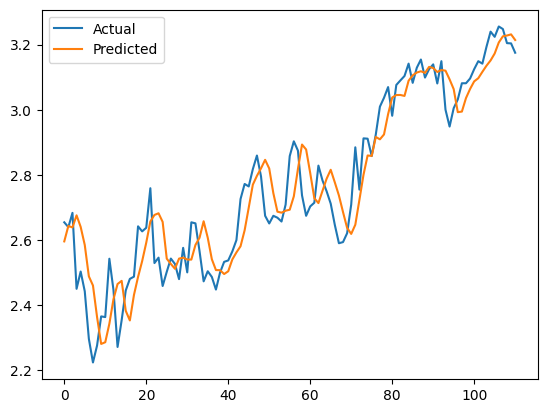

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
print('Root mean square error for ARIMA model: ', rmse_ARIMA)
print('Root mean square error for LSTM model: ', rmse_lstm)

Root mean square error for ARIMA model:  0.37213767064399794
Root mean square error for LSTM model:  0.09775219204488705
